In [94]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from torchvision import datasets

##### elements of both set are consists of tuples: 
image in index 0, label in index 1

In [48]:
# train = True for training set
trainset = datasets.MNIST("trainset", download=True, train=True, transform=None)

In [49]:
# train = False for test set
testset = datasets.MNIST("testset", download=True, train=False, transform=None)

In [50]:
# The number of mnist image files and size of each image
print(
    f"Length of trainset: {len(trainset)}, testset: {len(testset)}\n"
    f"Shape of trainset: {np.array(trainset[0][0]).shape}"
)

Length of trainset: 60000, testset: 10000
Shape of trainset: (28, 28)


In [51]:
trainset[0][0]

#### Define Functions for Training

1. Euclidean distance

In [73]:
def pixel_euclidean_distance(img1, img2):
    return np.sqrt(np.sum(np.square(img1 - img2)))

2. KNN Classification

In [95]:
def kNearestNeighbour(test_image, train_images, k):
    distances = []
    # Calculate the distance between the test image and every image in the training set
    # _ is a label, which we don't need to
    for img, _ in train_images:
        distances.append(
            pixel_euclidean_distance(test_image, np.array(img).flatten())
        )

    # Sort the distances and get the indices of k smallest distances
    k_indices = np.argsort(distances)[:k]

    # Retrieve the labels of the k nearest neighbors
    k_nearest_labels = [train_images[i][1] for i in k_indices]

    return k_indices, k_nearest_labels

#### Accuracy - Loop All Images

Currently set to 10000 images -> 60000 Takes a lot of time

In [97]:
# Returns the accuracy of the kNN algorithm, by decimal number
def knn_accuracy_test(test_samples, train_samples, k):
    total_case = 0

    correct_cases = 0
    for img, label in test_samples:
        img = np.array(img).flatten()
        _, k_nearest_labels = kNearestNeighbour(img, train_samples, k)
        # Find the most frequent label among the nearest neighbors
        result_indices, counts = np.unique(k_nearest_labels, return_counts=True)
        nearest_labels = result_indices[counts == counts.max()]

        # Check if the test label is among the labels of the nearest neighbors
        if label in nearest_labels:
            correct_cases += 1
        total_case += 1

    return correct_cases

In [ ]:
knn_accuracy_test(testset, trainset, 11)

#### Single Image Test

In [106]:
def predict_single_image(test_image, test_image_label, train_images_set, k):
    # Get the indices and labels of the k nearest neighbors
    nearest_indices, nearest_labels = kNearestNeighbour(test_image, train_images_set, k)

    # find frequency of each value
    nearest_indices, counts = np.unique(nearest_labels, return_counts=True)
    # display each value with highest frequency
    result_nearest_labels = nearest_indices[counts == counts.max()]

    # Check if the test label is among the labels of the nearest neighbors
    # returns the test image label, the predicted label, and 1 if the prediction is correct, 0 otherwise
    # returns as a type of tuple
    return (
        test_image_label,
        result_nearest_labels[0],
        1 if test_image_label == result_nearest_labels[0] else 0,
    )

In [ ]:
single_test_image = np.array(testset[0][0]).flatten()
single_test_image_label = testset[0][1]

predict_single_image(single_test_image, single_test_image_label, trainset, 5)

In [100]:
single_test_image = np.array(testset[1][0]).flatten()
single_test_image_label = testset[1][1]

predict_single_image(single_test_image, single_test_image_label, trainset, 11)

'Actual label: 2, Result: [1], Candidates: [1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1]'

In [84]:
# Accuracy in k = 5
for i in range(50):
    single_test_image = np.array(testset[i][0]).flatten()
    single_test_image_label = testset[i][1]

    print(predict_single_image(single_test_image, single_test_image_label, trainset, 5))

Actual label: 7, Result: [1], Candidates: [1, 1, 1, 4, 1]
Actual label: 2, Result: [1], Candidates: [1, 2, 1, 1, 1]
Actual label: 1, Result: [1], Candidates: [1, 1, 1, 1, 1]
Actual label: 0, Result: [0], Candidates: [0, 6, 2, 0, 7]
Actual label: 4, Result: [9], Candidates: [9, 9, 7, 4, 8]
Actual label: 1, Result: [1], Candidates: [1, 1, 1, 1, 1]
Actual label: 4, Result: [4], Candidates: [4, 4, 4, 9, 9]
Actual label: 9, Result: [4], Candidates: [7, 4, 1, 4, 4]
Actual label: 5, Result: [1], Candidates: [4, 1, 1, 1, 0]
Actual label: 9, Result: [3], Candidates: [3, 1, 7, 4, 3]
Actual label: 0, Result: [4], Candidates: [7, 2, 0, 4, 4]
Actual label: 6, Result: [4], Candidates: [4, 4, 6, 9, 4]
Actual label: 9, Result: [1], Candidates: [7, 0, 1, 4, 1]
Actual label: 0, Result: [1], Candidates: [4, 1, 1, 1, 1]
Actual label: 1, Result: [1], Candidates: [1, 1, 1, 1, 1]
Actual label: 5, Result: [1], Candidates: [1, 1, 1, 4, 4]
Actual label: 9, Result: [0 1 5 7 9], Candidates: [5, 7, 9, 0, 1]
Actual

### Show First 32 Elements of MNIST Trainset

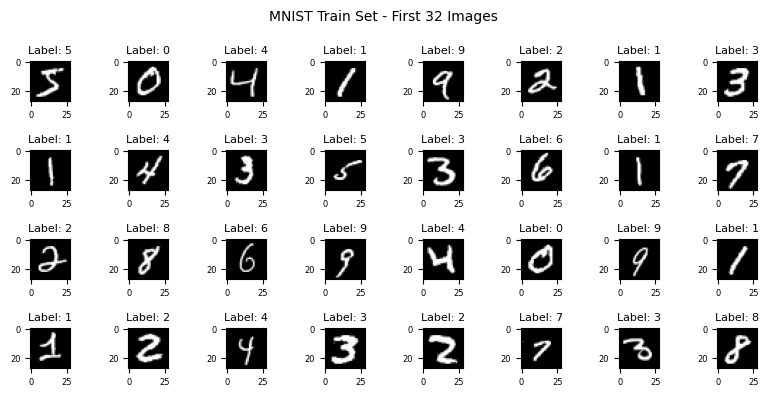

In [104]:
# Define row and column size for the plot
row, col = 4, 8
# plot images
fig, axes = plt.subplots(row, col, figsize=(col, row))
idx = 0
# Set the title of the plot
plt.suptitle(f"MNIST Train Set - First {int(row * col)} Images", fontsize=10)
for i in range(row):
    for j in range(col):
        ax = axes[i, j]
        # trainset[k][1] : label of the image
        # trainset[k][0] : the image
        ax.imshow(trainset[idx][0], cmap="gray")
        ax.tick_params(axis="both", which="major", labelsize=6)
        ax.set_title(f"Label: {trainset[idx][1]}", fontsize=8)
        idx += 1

plt.tight_layout()

### Show First 32 Prediction Results of MNIST Testset 

In [108]:
row, col = 4, 8
# plot images
fig, axes = plt.subplots(row, col, figsize=(col * 1.5, row * 1.2))
# idx is the index of the image in the test set
idx = 4000
# result is the number of correct predictions
result = 0
# Set the value of k for kNN
k = 13
for i in range(len(axes)):
    for j in range(len(axes[0])):
        # actual_label: the real label of the image
        # test_result: the result of the prediction
        # correction: 1 if the prediction is correct, 0 otherwise
        actual_label, test_result, correction = predict_single_image(
            np.array(testset[idx][0]).flatten(), testset[idx][1], trainset, k
        )
        # Define each subplot
        ax = axes[i, j]
        # testset[k][1] is the label of the image
        # testset[k][0] is the image
        ax.imshow(testset[idx][0], cmap="gray")
        # Set the size of the x, y tick labels
        ax.tick_params(axis="both", which="major", labelsize=6)
        # Subplot's title includes the result of the prediction and the real label of the image
        ax.set_title(f"Result: {test_result}, Label: {actual_label}", fontsize=6)
        # Increase the index to traverse the test set
        idx += 1
        # Add the correction value to the result
        result += correction
plt.suptitle(
    f"MNIST kNN - k={k}, Result: {result} of {int(row * col)} cases", fontsize=10
)
plt.tight_layout()